# Importing depencies

In [60]:
from pandas import Series, date_range
import pandas as pd
from sodapy import Socrata
from keys import api_key
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.pyplot import figure
import scipy.stats as st

## Data Gathering


In [ ]:
client = Socrata("data.melbourne.vic.gov.au", api_key)


for yr in [2019,2020,2021]:
    results = client.get("b2ak-trbp", limit=800000,year=yr)
    # Convert to pandas DataFrame
    globals()[f'results_df{yr}'] = pd.DataFrame.from_records(results)
    print(f'results_df{yr}')
#results = client.get("b2ak-trbp", limit=800000,year=2021)
    # Convert to pandas DataFrame
#results_df2021= pd.DataFrame.from_records(results)

In [ ]:
results_df2019.head()

In [ ]:
results_df2020.head()

In [ ]:
print(results_df2019["month"].unique())
print(results_df2019["sensor_id"].unique())
print(results_df2019["sensor_id"].shape)
print(results_df2021["sensor_id"].unique())
print(results_df2021["sensor_id"].shape)

In [ ]:
#Save df to csv files
results_df2019.to_csv('results_df2019.csv',index=False)
results_df2020.to_csv('results_df2020.csv',index=False)
results_df2021.to_csv('results_df2021.csv',index=False)

## Data Wrangling
1. Drop NaN values
2. Verify shape of the dataFrame for all 3 years
3. Checking duplicates
4. Correcting Data Type

In [43]:
e=pd.read_csv("employed full time 2019 2020 20121.csv") 

In [2]:
e=pd.read_csv("employed full time 2019 2020 20121.csv") 
l=pd.read_csv("lockdown.csv") 
print(e)
results_df2019=pd.read_csv("results_df2019.csv") 
results_df2020=pd.read_csv("results_df2020.csv") 
results_df2021=pd.read_csv("results_df2021.csv") 
#Data Pre Processing
results_df2019=results_df2019.dropna(how="any")
results_df2019.shape
results_df2019["hourly_counts"]=pd.to_numeric(results_df2019["hourly_counts"])
results_df2020=results_df2020.dropna(how="any")
results_df2020.shape
results_df2020["hourly_counts"]=pd.to_numeric(results_df2020["hourly_counts"])
results_df2021=results_df2021.dropna(how="any")
results_df2021.shape
results_df2021["hourly_counts"]=pd.to_numeric(results_df2021["hourly_counts"])


        month  Person Employed 2019  Person Employed 2020  \
0     January                2284.5                2329.6   
1    February                2292.7                2311.0   
2       March                2298.8                2306.5   
3       April                2282.0                2279.1   
4         May                2295.5                2262.0   
5        June                2288.9                2245.4   
6        July                2312.1                2226.2   
7      August                2303.5                2211.4   
8   September                2311.7                2201.1   
9     October                2316.2                2244.7   
10   November                2304.0                2265.3   
11   December                2304.0                2256.9   

    Person Employed 2020.1  
0                   2299.3  
1                   2311.2  
2                   2305.4  
3                   2311.9  
4                   2344.0  
5                   2347.9  
6  

#### Grouping data based on pedestrian count for each day in total for each sensor

In [3]:
#count per day 2019
results_df2019["daily_Count"]=0
per_day_count=results_df2019.groupby(["sensor_name","month","day"])["hourly_counts"].sum()
results_df2019_perdayCount=per_day_count.reset_index()

#count per day 2020
results_df2020["daily_Count"]=0
per_day_count2020=results_df2020.groupby(["sensor_name","month","day"])["hourly_counts"].sum()
results_df2020_perdayCount=per_day_count2020.reset_index()

#count per day 2021
results_df2021["daily_Count"]=0
per_day_count=results_df2021.groupby(["sensor_name","month","day"])["hourly_counts"].sum()
results_df2021_perdayCount=per_day_count.reset_index()



(3691, 4)

#### Joining/ Merging dataset
1. Total Pedestrian acitivity per month across year 2019,2020,2021
2. Renaming columns

In [4]:
#Merge all the df
merged_2019_2020_df=pd.merge(results_df2019_perdayCount,results_df2020_perdayCount,on=["sensor_name","month","day"],suffixes=("_2019","_2020"),how="outer")

merged_2019_2020_df["month"].unique()
merged_2019_2020_df=merged_2019_2020_df.rename(columns={'hourly_counts_2019':'day_based_counts2019',
                                                                 'hourly_counts_2020':'day_based_counts2020'})
merged_2019_2020_df["month"].unique()

#Merge all the df
merged_2019_2020_2021_df=pd.merge(merged_2019_2020_df,results_df2021_perdayCount,on=["sensor_name","month","day"],how="left")
#merged_2019_2020_2021_df.dropna(how="any",inplace=True)
merged_2019_2020_2021_df=merged_2019_2020_2021_df.rename(columns={'hourly_counts':'day_based_counts2021'})
merged_2019_2020_2021_df["month"].unique()
merged_2019_2020_2021_df.head()

,sensor_name,month,day,day_based_counts2019,day_based_counts2020,day_based_counts2021
0,Alfred Place,April,Friday,29607.0,2309.0,8643.0
1,Alfred Place,April,Monday,37167.0,2410.0,7513.0
2,Alfred Place,April,Saturday,11889.0,806.0,4150.0
3,Alfred Place,April,Sunday,8249.0,566.0,2292.0
4,Alfred Place,April,Thursday,30234.0,3601.0,10258.0


#### Complete dataset view

In [5]:
#Dataset full view
pd.set_option("max_columns", None) # show all cols
pd.set_option("expand_frame_repr", True)
pd.set_option('display.max_rows', None)
print(merged_2019_2020_2021_df)

                                 sensor_name      month        day  \
0                               Alfred Place      April     Friday   
1                               Alfred Place      April     Monday   
2                               Alfred Place      April   Saturday   
3                               Alfred Place      April     Sunday   
4                               Alfred Place      April   Thursday   
5                               Alfred Place      April    Tuesday   
6                               Alfred Place      April  Wednesday   
7                               Alfred Place     August     Friday   
8                               Alfred Place     August     Monday   
9                               Alfred Place     August   Saturday   
10                              Alfred Place     August     Sunday   
11                              Alfred Place     August   Thursday   
12                              Alfred Place     August    Tuesday   
13                  

#### Total sensors and counts in the Dataset

In [6]:
#common sensors across the db
a=merged_2019_2020_2021_df["sensor_name"].unique().tolist()
print(a)
len(a)


['Alfred Place', 'Birrarung Marr', 'Bourke St - Spencer St (North)', 'Bourke St Bridge', 'Bourke St-Russell St (West)', 'Bourke Street Mall (North)', 'Bourke Street Mall (South)', 'Chinatown-Lt Bourke St (South)', 'Chinatown-Swanston St (North)', 'Collins Place (North)', 'Collins Place (South)', 'Collins St (North)', 'Elizabeth St-La Trobe St (East)', 'Elizabeth St-Lonsdale St (South)', 'Faraday St-Lygon St (West)', 'Flinders La - Swanston St (West) Temp', 'Flinders La-Swanston St (West)', 'Flinders St-Elizabeth St (East)', 'Flinders St-Spark La', 'Flinders St-Spring St (West)', 'Flinders Street Station Underpass', 'Flinders la - Swanston St (West) Temp', 'Grattan St-Swanston St (West)', 'La Trobe St (North)', 'Lincoln-Swanston (West)', 'Lincoln-Swanston(West)', 'Little Collins St-Swanston St (East)', 'Lonsdale St (South)', 'Lonsdale St - Elizabeth St (North)', 'Lonsdale St-Spring St (West)', 'Lygon St (East)', 'Lygon St (West)', 'Melbourne Central', 'Melbourne Central-Elizabeth St (Ea

71

In [22]:
#month_count2021_df=merged_2019_2020_2021_df.groupby(["month"])["day_based_counts2021"].sum()
#month_count2021_df.head()
#month_count2019_df=merged_2019_2020_df.groupby(["month"])["day_based_counts2019"].sum()
#month_count2019_df.head()
#month_count2020_df=merged_2019_2020_df.groupby(["month"])["day_based_counts2020"].sum()
#month_count2020_df.head()

#### Data sort: Data sorted using Monthly order using categorical data type

In [8]:
month_count2019_20_df=merged_2019_2020_2021_df.groupby(["month"])["day_based_counts2019","day_based_counts2020","day_based_counts2021"].sum()
month_count2019_20_df.head()
df=month_count2019_20_df
df=df.reset_index()
print("Old df: Unsorted")
sorted_months=["January","February","March","April","May","June","July","August", "September", "October","November", "December"]
df.index=pd.CategoricalIndex(df["month"],categories=sorted_months,ordered=True)
df

Old df: Unsorted


,month,day_based_counts2019,day_based_counts2020,day_based_counts2021
month,,,,
April,April,22818120.0,3965628.0,15917378.0
August,August,23896524.0,3157701.0,5678484.0
December,December,24931172.0,14153423.0,0.0
February,February,18816254.0,21853368.0,8775020.0
January,January,18904686.0,23189121.0,10904769.0
July,July,22744685.0,5394964.0,10791452.0
June,June,20194222.0,8573779.0,9123174.0
March,March,23181242.0,16576373.0,13412576.0
May,May,21590920.0,6257626.0,8189692.0


In [9]:
df=df.sort_index().reset_index(drop=True)
df

,month,day_based_counts2019,day_based_counts2020,day_based_counts2021
0,January,18904686.0,23189121.0,10904769.0
1,February,18816254.0,21853368.0,8775020.0
2,March,23181242.0,16576373.0,13412576.0
3,April,22818120.0,3965628.0,15917378.0
4,May,21590920.0,6257626.0,8189692.0
5,June,20194222.0,8573779.0,9123174.0
6,July,22744685.0,5394964.0,10791452.0
7,August,23896524.0,3157701.0,5678484.0
8,September,21107792.0,3789356.0,0.0
9,October,24738547.0,5274979.0,0.0


#### Merge full-time employment data for year 2019, 2020, 2021

In [45]:
df3_employed=df.merge(e,on="month")
df3_employed

,month,day_based_counts2019,day_based_counts2020,day_based_counts2021,Person Employed 2019,Person Employed 2020,Person Employed 2020.1
0,January,18904686.0,23189121.0,10904769.0,2284500,2329600,2299300
1,February,18816254.0,21853368.0,8775020.0,2292700,2311000,2311200
2,March,23181242.0,16576373.0,13412576.0,2298800,2306500,2305400
3,April,22818120.0,3965628.0,15917378.0,2282000,2279100,2311900
4,May,21590920.0,6257626.0,8189692.0,2295500,2262000,2344000
5,June,20194222.0,8573779.0,9123174.0,2288900,2245400,2347900
6,July,22744685.0,5394964.0,10791452.0,2312100,2226200,2356000
7,August,23896524.0,3157701.0,5678484.0,2303500,2211400,2373900
8,September,21107792.0,3789356.0,0.0,2311700,2201100,0
9,October,24738547.0,5274979.0,0.0,2316200,2244700,0


## Plots

#### Bar chart: Pedestrian count per month in year 2019, 2020, 2021

##### Hypothesis Two: Average Pedestrian activity increased after the first lockdown, but not to pre-pandemic levels (average of August 2019 to February 2020).


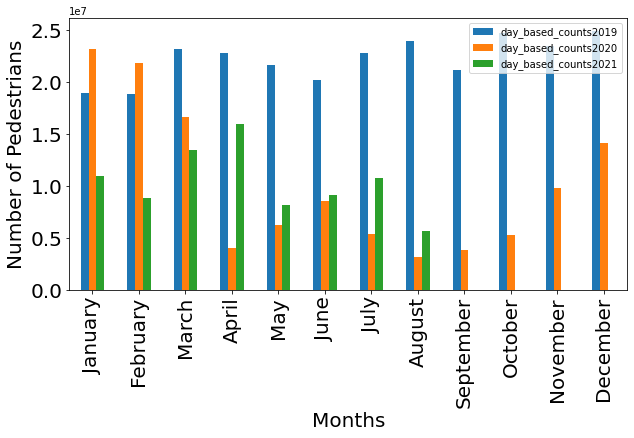

In [36]:
#Bar chart
b1=df.plot(x="month",kind="bar",figsize=[10,5],fontsize=20)#, stacked=True
fig = b1.get_figure()
b1.set_xlabel("Months",fontsize=20)
b1.set_ylabel("Number of Pedestrians",fontsize=20)
#b1.title("Pedestrian count per month in year 2019, 2020, 2021")
#Bar chart.legend(["Pedestrian Counts 2019", "Pedestrian Counts 2020","Pedestrian Counts 2021"],fontsize=20)
fig.savefig('2019_2020_2021Bar.png')

In [42]:
stat,pvalEmployment=stats.ttest_ind(df["day_based_counts2020"], df["day_based_counts2019"], equal_var=False)
if pvalEmployment < 0.05:
    print("Reject the Null hypothesis- There is a significant change in both categories with p-value",pvalEmployment)
else:
    print("Null Hypothesis: No change in pedestrian acitvity pre or post lockdown")

Reject the Null hypothesis- There is a significant change in both categories with p-value 8.511069185906906e-05


#### Data clipped for comparison from January to August (2019,2020,2021*)

Because 2021 data on pedestrian acitivty is only avaibale upto August, thus for a relative comparison, only these months are used

In [13]:
# Relationship from scatter plot
df1=df.loc[df["month"].isin(["January","February","March","April","May","June","July","August"])]
df1


,month,day_based_counts2019,day_based_counts2020,day_based_counts2021
0,January,18904686.0,23189121.0,10904769.0
1,February,18816254.0,21853368.0,8775020.0
2,March,23181242.0,16576373.0,13412576.0
3,April,22818120.0,3965628.0,15917378.0
4,May,21590920.0,6257626.0,8189692.0
5,June,20194222.0,8573779.0,9123174.0
6,July,22744685.0,5394964.0,10791452.0
7,August,23896524.0,3157701.0,5678484.0


#### Scatter plot to analyse relation between lockdown (year 2020) and prelockdown (2019)

You can see that there is a negative linear relation between the points. That is, as X increases, Y decreases 

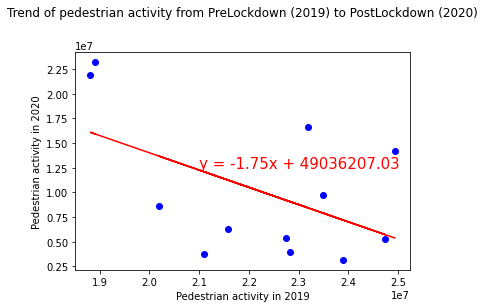

In [33]:

x_values=df['day_based_counts2019']
y_values=df['day_based_counts2020']
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(2.1e7,1.25e7),fontsize=15,color="red")
plt.xlabel('Pedestrian activity in 2019')
plt.ylabel('Pedestrian activity in 2020')
plt.title("Trend of pedestrian activity from PreLockdown (2019) to PostLockdown (2020)\n\n")

plt.show()

In [15]:
df=df.dropna(how='any')

#### Line Graph for pedestrian count across month January-August for 2019, 2020, 2021*

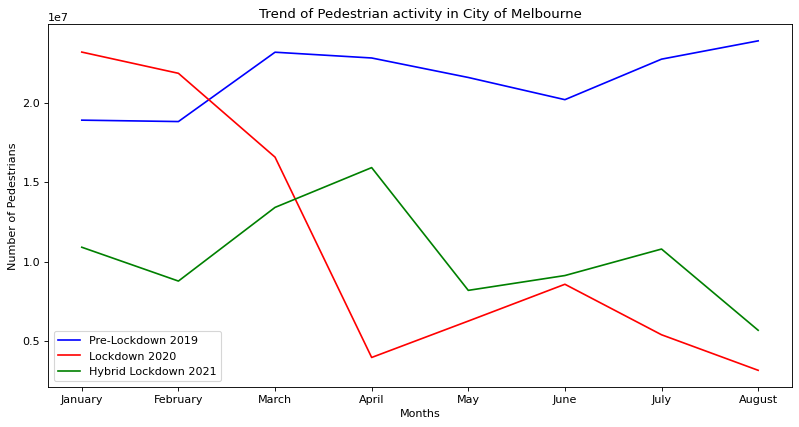

In [16]:
#Line chart

figure(figsize=(12, 6), dpi=80)
ped_avg2019,=plt.plot(df1["month"],df1['day_based_counts2019'], color="blue", label="Pre-Lockdown 2019")
ped_avg2020,=plt.plot(df1["month"],df1['day_based_counts2020'], color="red", label="Lockdown 2020")
ped_avg2021,=plt.plot(df1["month"],df1['day_based_counts2021'], color="green", label="Hybrid Lockdown 2021")

plt.title("Trend of Pedestrian activity in City of Melbourne")
plt.ylabel("Number of Pedestrians")
plt.xlabel("Months")

plt.legend(handles=[ped_avg2019, ped_avg2020,ped_avg2021], loc="best")

## Statistical Analysis

##### Hypothesis Five: Pedestrian activity increases as the number of Victorian full-time workers increases.

In [46]:
df3_employed

,month,day_based_counts2019,day_based_counts2020,day_based_counts2021,Person Employed 2019,Person Employed 2020,Person Employed 2020.1
0,January,18904686.0,23189121.0,10904769.0,2284500,2329600,2299300
1,February,18816254.0,21853368.0,8775020.0,2292700,2311000,2311200
2,March,23181242.0,16576373.0,13412576.0,2298800,2306500,2305400
3,April,22818120.0,3965628.0,15917378.0,2282000,2279100,2311900
4,May,21590920.0,6257626.0,8189692.0,2295500,2262000,2344000
5,June,20194222.0,8573779.0,9123174.0,2288900,2245400,2347900
6,July,22744685.0,5394964.0,10791452.0,2312100,2226200,2356000
7,August,23896524.0,3157701.0,5678484.0,2303500,2211400,2373900
8,September,21107792.0,3789356.0,0.0,2311700,2201100,0
9,October,24738547.0,5274979.0,0.0,2316200,2244700,0


#### Use scatter plot to find relation between two factors

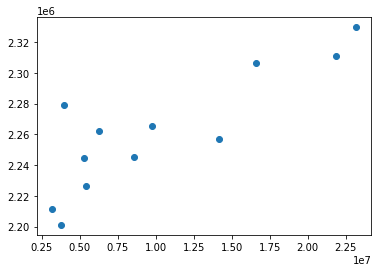

In [47]:
plt.scatter(df3_employed["day_based_counts2020"],df3_employed["Person Employed 2020"])

#### Plot line graph to show linear regression and estimate Model

In [48]:
df3_employed["day_based_counts2020"].corr(df3_employed["Person Employed 2020"])

0.8471311321828738

In [49]:
x_val=df3_employed["day_based_counts2020"]

In [50]:
y_val=df3_employed["Person Employed 2020"]

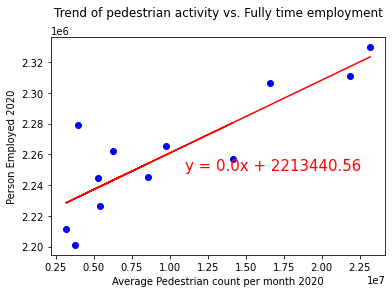

In [66]:
(slope2, intercept2, rvalue2, pvalue2, stderr2) =linregress(x_val, y_val)
regress_values2 = x_val * slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2))
plt.scatter(x_val,y_val, color="blue")
plt.plot(x_val,regress_values2,"r-")
plt.annotate(line_eq,(1.1e7,2.25e6),fontsize=15,color="red")
plt.xlabel('Average Pedestrian count per month 2020')
plt.ylabel('Person Employed 2020')
plt.title("Trend of pedestrian activity vs. Fully time employment\n")

plt.show()

#### Perform Pearson Correlation test to find correlation and p-value from data

In [64]:
corr2=st.pearsonr(x_val,y_val)
print(f'The correlation between full time employment and pedestrian count is {round(corr2[0],2)} with p-value {round(pvalue2,4)}')

The correlation between full time employment and pedestrian count is 0.85 with p-value 0.0005


In [65]:
plt.savefig("Pedestrian Count vs. Full time employment.png")

<Figure size 432x288 with 0 Axes>